# netcdf形式のデータのハンドリング事例


ライブラリの準備

In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.ticker as mticker
from cartopy.mpl.ticker import LatitudeFormatter,LongitudeFormatter
from cartopy.util import add_cyclic_point

## JRA-3Q

気象庁が作成しDIASからも公開されている全球大気再解析
[JRA-3Q](https://search.diasjp.net/ja/dataset/JRA3Q)
の気候値データを用いて、可視化を行う。

In [2]:
ds = xr.open_dataset("./Data/anl_p125_hgt.clim9120.mon01.nc")
ds

<xarray.Dataset> Size: 8MB
Dimensions:  (time: 1, lon: 288, lat: 145, plev: 45)
Coordinates:
  * time     (time) datetime64[ns] 8B 1991-01-01
  * lon      (lon) float64 2kB 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * lat      (lat) float64 1kB 90.0 88.75 87.5 86.25 ... -87.5 -88.75 -90.0
  * plev     (plev) float64 360B 1.0 3.0 10.0 30.0 ... 9.5e+04 9.75e+04 1e+05
Data variables:
    gh       (time, plev, lat, lon) float32 8MB ...
Attributes:
    CDI:          Climate Data Interface version 2.3.0 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Fri Nov 22 16:51:50 2024: cdo -f nc copy ./anl_p125/anl_p12...
    CDO:          Climate Data Operators version 2.3.0 (https://mpimet.mpg.de...

経度方向に288グリッド、緯度方向に145グリッド、鉛直方向に45層、時間方向に12時刻、という次元が存在する。なお緯度は北極点から南向きに定義されている。

500hPa面のジオポテンシャル高度データを抽出する。
なお高度の座標軸は"hPa"ではなく"Pa"で定義されている。

In [3]:
z500 = ds.gh.sel(plev=50000, time='1991-01-01')
z500

<xarray.DataArray 'gh' (lat: 145, lon: 288)> Size: 167kB
[41760 values with dtype=float32]
Coordinates:
    time     datetime64[ns] 8B 1991-01-01
  * lon      (lon) float64 2kB 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * lat      (lat) float64 1kB 90.0 88.75 87.5 86.25 ... -87.5 -88.75 -90.0
    plev     float64 8B 5e+04
Attributes:
    standard_name:  geopotential_height
    long_name:      Geopotential height
    units:          gpm
    param:          5.3.0

Z500の空間分布図を描く。

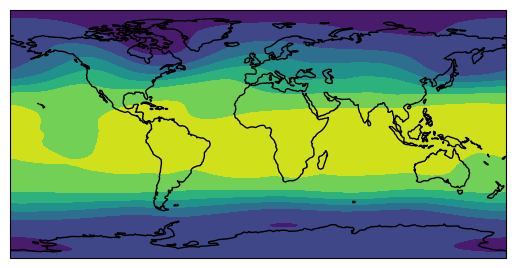

In [4]:
z500b, lons = add_cyclic_point(z500, coord=z500.lon)

fig = plt.figure()
ax = plt.axes(projection=ccrs.PlateCarree())
ax.contourf(lons, z500.lat, z500b, transform=ccrs.PlateCarree())
ax.coastlines()

dsとz500を削除する。

In [5]:
del ds, z500

東西風成分の気候値を読み込み鉛直断面を可視化する。

In [6]:
ds = xr.open_dataset("./Data/anl_p125_ugrd.clim9120.mon01.nc")
ds

<xarray.Dataset> Size: 8MB
Dimensions:  (time: 1, lon: 288, lat: 145, plev: 45)
Coordinates:
  * time     (time) datetime64[ns] 8B 1991-01-01
  * lon      (lon) float64 2kB 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * lat      (lat) float64 1kB 90.0 88.75 87.5 86.25 ... -87.5 -88.75 -90.0
  * plev     (plev) float64 360B 1.0 3.0 10.0 30.0 ... 9.5e+04 9.75e+04 1e+05
Data variables:
    u        (time, plev, lat, lon) float32 8MB ...
Attributes:
    CDI:          Climate Data Interface version 2.3.0 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Fri Nov 22 16:51:54 2024: cdo -f nc copy ./anl_p125/anl_p12...
    CDO:          Climate Data Operators version 2.3.0 (https://mpimet.mpg.de...

東経140度線に沿った東西風の鉛直断面を作成する。

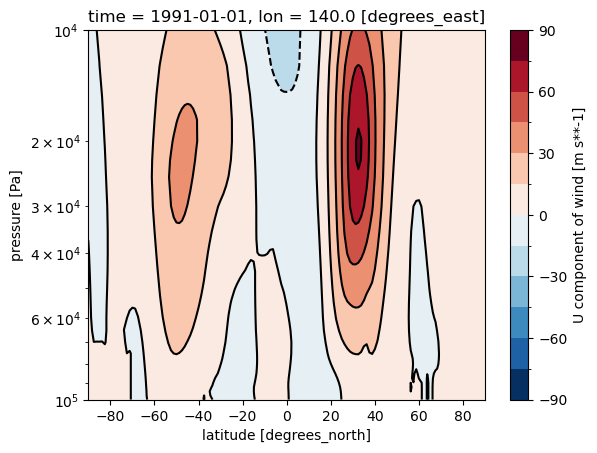

In [7]:
ds.u.isel(time=0).sel(lon=140, plev=slice(10000,100000)).plot.contourf(
    yincrease=False,
    yscale='log',
    levels=np.linspace(-90,90,13)
)
ds.u.isel(time=0).sel(lon=140, plev=slice(10000,100000)).plot.contour(
    yincrease=False,
    yscale='log', 
    levels=np.linspace(-90,90,13),
    colors='black'
)

In [8]:
del ds

## FORA-WNP30

JAMSTECと気象研究所が共同で作成した北西太平洋海洋長期再解析データセット
[FORA-WNP30](https://search.diasjp.net/ja/dataset/FORA_WNP30_JAMSTEC_MRI)
は船舶やブイなどによる観測値に対して補正をかけて、客観解析したデータである。
サンプルとして1982年1月1日のデータのサブセットを用いる。

In [9]:
ds = xr.open_dataset("./Data/m4dv19820101.to.nc")
ds

<xarray.Dataset> Size: 36MB
Dimensions:  (lont: 673, latt: 442, depth: 30)
Coordinates:
  * lont     (lont) float32 3kB 116.8 116.9 117.0 117.1 ... 199.8 200.0 200.2
  * latt     (latt) float32 2kB 14.8 14.9 15.0 15.1 ... 64.5 64.67 64.83 65.0
  * depth    (depth) float32 120B 0.5 1.5 4.0 7.0 ... 540.0 600.0 670.0 740.0
Data variables:
    to       (depth, latt, lont) float32 36MB ...
Attributes:
    CDI:                             Climate Data Interface version 2.3.0 (ht...
    Conventions:                     CF-1.6
    source:                          MOVE-4DVAR
    institution:                     CEIST-JAMSTEC and MRI-JMA
    title:                           FORA-WNP30 (4-dimensional Ocean ReAnalys...
    history:                         Tue Nov 26 15:15:07 2024: cdo -f nc4c -z...
    references:                      Usui et al. (2016) submitted.
    m4dv_assimilation_window_start:  1982-01-01
    m4dv_assimilation_window_end:    1982-01-10
    CDO:                             Climate Data Operators version 2.3.0 (ht...

このdsは４次元であり、
水温(to)、塩分(so)、
それらに関連する情報が含まれている。
なお北西太平洋の一部の海域の海洋上層の30層だけを抽出したデータである。
流速のサブセットデータは"m4dv19820101.uv.nc"である。

深さ方向で0番目（一番浅い層）の水温を取り出し、水温の単位を摂氏に変換する。
そして、空間分布図を描く。

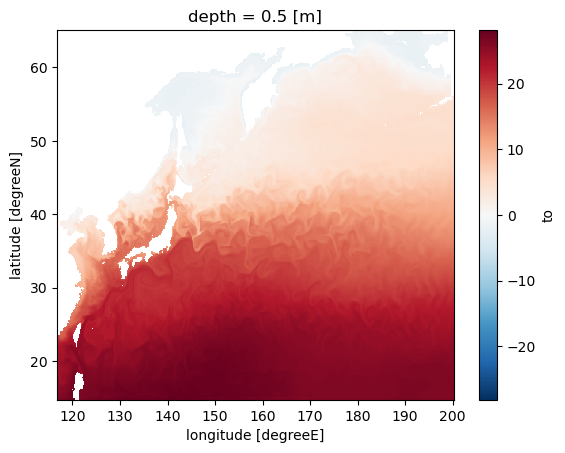

In [10]:
(ds.to.isel(depth=0) - 273.15).plot()

東経150度線に沿って、北緯20度から北緯60度の範囲のデータを切り出し、
鉛直断面を描く。

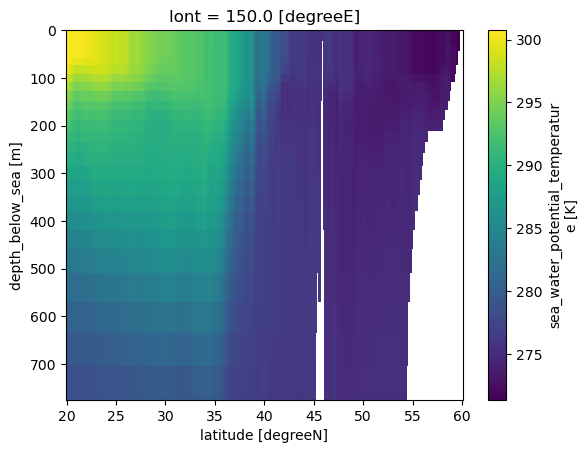

In [11]:
ds.to.sel(lont=150, latt=slice(20,60)).plot(yincrease=False)

東経150度〜160度、北緯25度〜35度の領域の水温データを取り出し、
領域平均を作成し、水温の鉛直プロファイルを描く。

In [12]:
temp2 = ds["to"].sel(lont=slice(150,160),latt=slice(25,35))
t_prof = temp2.mean(dim=['lont','latt'])
t_prof

<xarray.DataArray 'to' (depth: 30)> Size: 120B
array([294.5959 , 294.5959 , 294.59598, 294.59607, 294.59622, 294.59644,
       294.59787, 294.59903, 294.59717, 294.545  , 294.22742, 293.56116,
       292.73618, 291.847  , 291.10034, 290.52588, 290.0641 , 289.71814,
       289.3926 , 289.06073, 288.58832, 288.03973, 287.41797, 286.50452,
       285.5263 , 284.5183 , 283.0526 , 281.7016 , 280.32553, 279.20834],
      dtype=float32)
Coordinates:
  * depth    (depth) float32 120B 0.5 1.5 4.0 7.0 ... 540.0 600.0 670.0 740.0

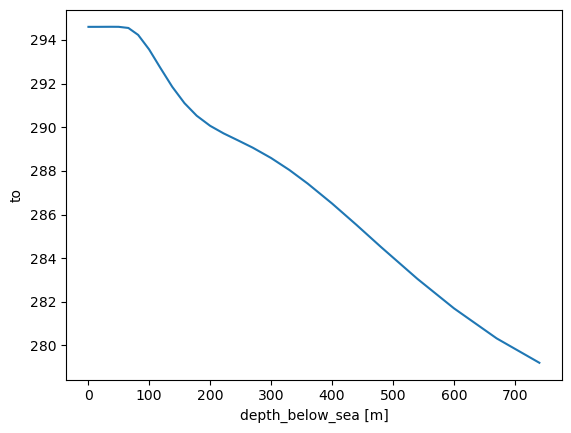

In [13]:
t_prof.plot()

x軸に水温、y軸に水深とするため、次のようにする。

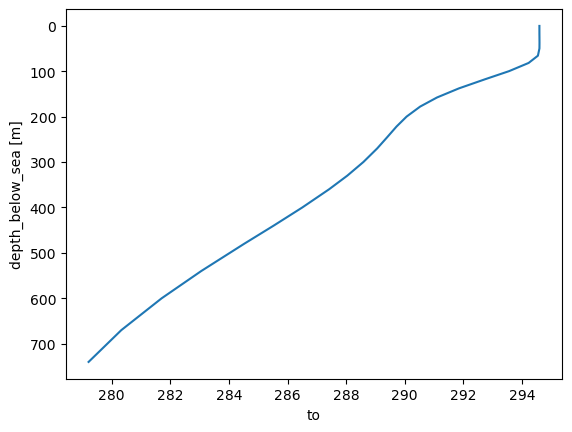

In [14]:
t_prof.plot(y="depth", yincrease=False)

In [15]:
del ds, temp2, t_prof

## WOCE測線データ

[CLIVAR and Carbon Hydrographic Data Office (CCHDO)](https://cchdo.ucsd.edu) から公開されているR/Vみらいが2021年夏季に実施したWOCEのP01線の観測データを見てみる。

In [16]:
import cartopy.crs as ccrs
import matplotlib.ticker as mticker

In [17]:
ds2 = xr.open_dataset("./Data/49NZ20210713_bottle.nc")
ds2

<xarray.Dataset> Size: 1MB
Dimensions:                      (N_PROF: 66, N_LEVELS: 36, CDOM_WAVELENGTHS: 3)
Coordinates:
    expocode                     (N_PROF) object 528B ...
    station                      (N_PROF) object 528B ...
    cast                         (N_PROF) int32 264B ...
    sample                       (N_PROF, N_LEVELS) object 19kB ...
    time                         (N_PROF) datetime64[ns] 528B ...
    latitude                     (N_PROF) float64 528B ...
    longitude                    (N_PROF) float64 528B ...
    pressure                     (N_PROF, N_LEVELS) float64 19kB ...
  * N_PROF                       (N_PROF) int64 528B 0 1 2 3 4 ... 62 63 64 65
  * N_LEVELS                     (N_LEVELS) int64 288B 0 1 2 3 4 ... 32 33 34 35
  * CDOM_WAVELENGTHS             (CDOM_WAVELENGTHS) int32 12B 300 325 443
Data variables: (12/71)
    section_id                   (N_PROF) object 528B ...
    bottle_number                (N_PROF, N_LEVELS) object 19kB ...
    bottle_number_qc             (N_PROF, N_LEVELS) float32 10kB ...
    btm_depth                    (N_PROF) float64 528B ...
    pressure_qc                  (N_PROF, N_LEVELS) float32 10kB ...
    ctd_temperature              (N_PROF, N_LEVELS) float64 19kB ...
    ...                           ...
    ctd_cdom                     (N_PROF, N_LEVELS) float64 19kB ...
    ctd_cdom_qc                  (N_PROF, N_LEVELS) float32 10kB ...
    chlorophyll_a                (N_PROF, N_LEVELS) float64 19kB ...
    chlorophyll_a_qc             (N_PROF, N_LEVELS) float32 10kB ...
    profile_type                 (N_PROF) object 528B ...
    geometry_container           float64 8B ...
Attributes:
    Conventions:               CF-1.8 CCHDO-1.0
    cchdo_software_version:    hydro 1.0.2.5
    cchdo_parameters_version:  params 2023.9.0
    comments:                  BOTTLE,20231011CCHSIOENA\n Several parameter u...
    featureType:               profile

観測点の分布図を作成する。

In [18]:
lat = ds2["latitude"]
lon = ds2["longitude"]

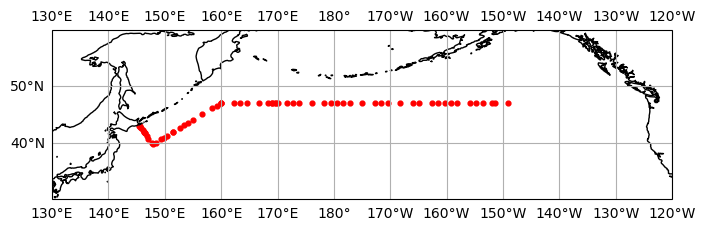

In [19]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(
    1,1,1,
    projection=ccrs.PlateCarree(central_longitude=180))
ax.coastlines()
ax.set_extent([130,240,30,60], ccrs.PlateCarree())

gl = ax.gridlines(draw_labels=True, crs=ccrs.PlateCarree())
gl.xlocator = mticker.FixedLocator(np.arange(-180,180,10))
gl.ylocator = mticker.FixedLocator(np.arange(30,61,10))

ax.scatter(lon, lat, transform=ccrs.PlateCarree(), color="red", s=12)

測線に沿った溶存酸素の鉛直プロファイルを描く。
ただし深さ（N_LEVELS）は必ず同じ水圧である保証はない。

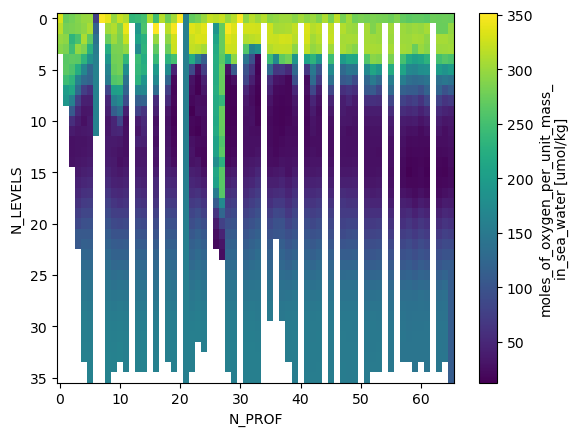

In [20]:
ds2.ctd_oxygen.transpose().plot(yincrease=False)

ある観測点での溶存酸素の鉛直プロファイルを描く。

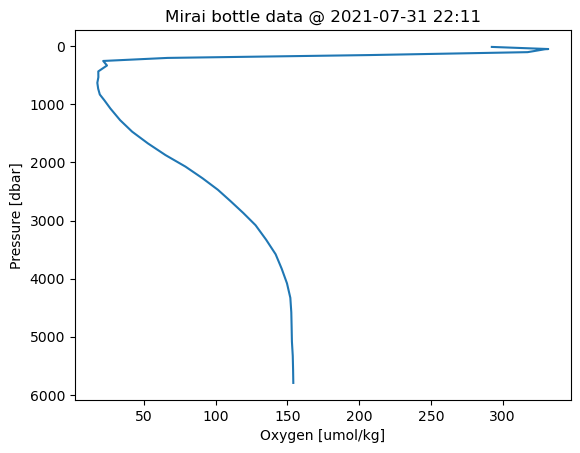

In [21]:
nprof=41
plt.plot(ds2.ctd_oxygen[nprof], ds2.pressure[nprof])
plt.xlabel("Oxygen [umol/kg]")
plt.ylabel("Pressure [dbar]")
plt.title("Mirai bottle data @ %s" % ds2.time[nprof].dt.strftime("%Y-%m-%d %H:%M").values)
plt.gca().invert_yaxis()

同じ地点でのリン酸塩の鉛直プロファイルを描いてみる。

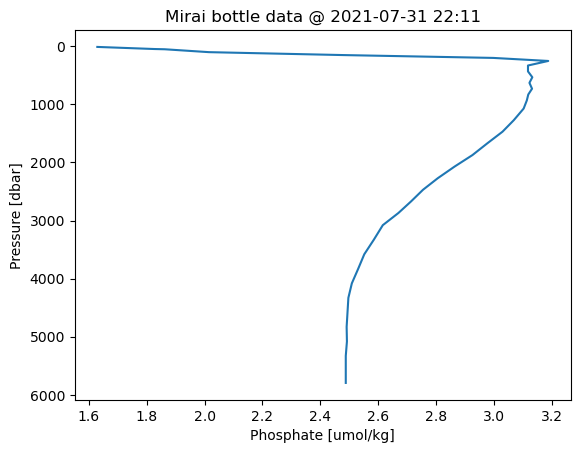

In [22]:
nprof=41
plt.plot(ds2.phosphate[nprof], ds2.pressure[nprof])
plt.xlabel("Phosphate [umol/kg]")
plt.ylabel("Pressure [dbar]")
plt.title("Mirai bottle data @ %s" % ds2.time[nprof].dt.strftime("%Y-%m-%d %H:%M").values)
plt.gca().invert_yaxis()

In [23]:
del ds2, lat, lon

## Argoフロート

日本が投入したArgoフロートについては気象庁の
[日本のアルゴフロートの活動状況](https://ds.data.jma.go.jp/gmd/argo/data/status/statusJMA.html)
から情報が入手できる。

また、米国NOAAの
[Argo Floats Data](https://nodc.noaa.gov/argo/floats_data.htm)
からnetcdf形式のデータを取得できる。

ここでは日本東方海上で投入された"2903368"のデータを見てみる。

In [24]:
ds3 = xr.open_dataset("./Data/nodc_2903368_prof.nc")
ds3

<xarray.Dataset> Size: 585kB
Dimensions:                       (n_prof: 87, n_param: 3, n_levels: 76,
                                   n_calib: 1, n_history: 0)
Dimensions without coordinates: n_prof, n_param, n_levels, n_calib, n_history
Data variables: (12/65)
    data_type                     object 8B ...
    format_version                object 8B ...
    handbook_version              object 8B ...
    reference_date_time           object 8B ...
    date_creation                 object 8B ...
    date_update                   object 8B ...
    ...                            ...
    history_parameter             (n_history, n_prof) object 0B ...
    history_start_pres            (n_history, n_prof) float32 0B ...
    history_stop_pres             (n_history, n_prof) float32 0B ...
    history_previous_value        (n_history, n_prof) float32 0B ...
    history_qctest                (n_history, n_prof) object 0B ...
    crs                           int32 4B ...
Attributes: (12/49)
    title:                           Argo float vertical profile
    institution:                     FR GDAC
    source:                          Argo float
    history:                         2020-07-21T08:42:29Z boyer convAGDAC.f90...
    references:                      https://www.nodc.noaa.gov/argo/
    user_manual_version:             3.1
    ...                              ...
    time_coverage_end:               2020-07-16T15:10:27Z
    time_coverage_duration:          point
    time_coverage_resolution:        point
    gadr_ConventionVersion:          GADR-3.0
    gadr_program:                    convAGDAC.f90
    gadr_programVersion:             1.2

以下の作図は、github.comで公開されている"2020 Data Labs REU"のノートブック
[Activity_4_Argo_Data.ipynb](https://github.com/ooi-data-lab/datalab-reu-2020/blob/master/Activity_4_Argo_Data.ipynb)の一部のスクリプトを借用している。

水温の時間断面図を作成する。

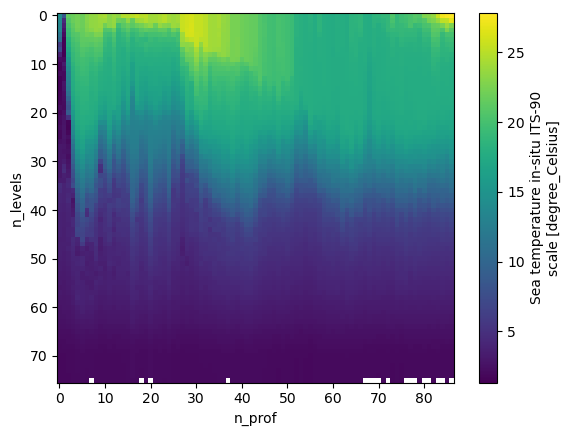

In [25]:
ds3.temp_adjusted.T.plot()
plt.gca().invert_yaxis()

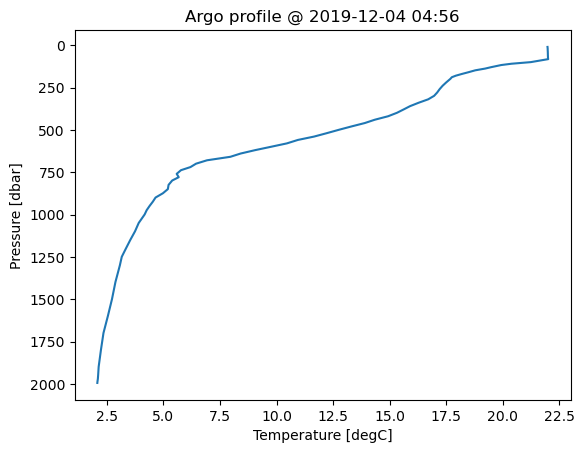

In [26]:
nprof = 40
plt.plot(ds3.temp_adjusted[nprof], ds3.pres_adjusted[nprof])
plt.xlabel("Temperature [degC]")
plt.ylabel("Pressure [dbar]")
plt.title("Argo profile @ %s" % ds3.juld[nprof].dt.strftime("%Y-%m-%d %H:%M").values)
plt.gca().invert_yaxis()

Text(0.5, 0.98, 'Argo float #2903368')

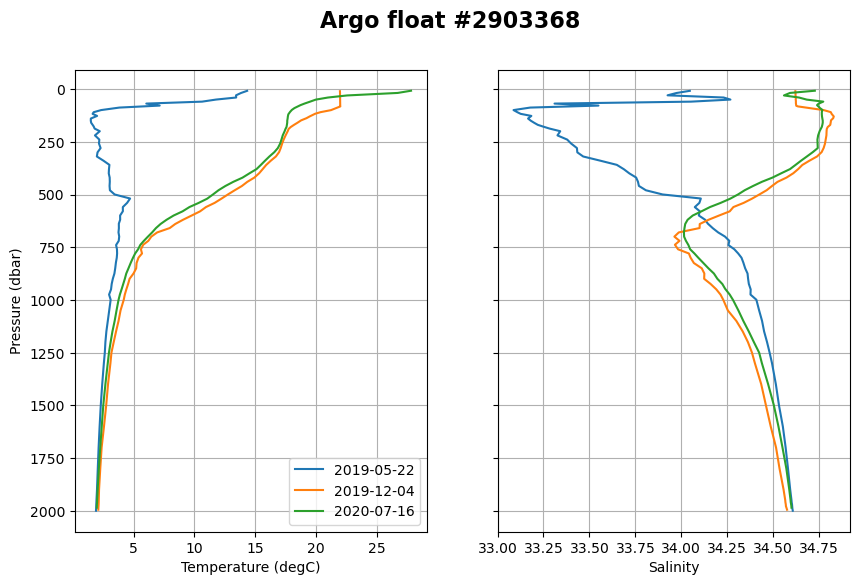

In [27]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(10,6))

nprof = 0
ax1.plot(ds3.temp_adjusted[nprof], ds3.pres_adjusted[nprof]
         , label=ds3.juld[nprof].dt.strftime("%Y-%m-%d").values)
ax2.plot(ds3.psal_adjusted[nprof], ds3.pres_adjusted[nprof])

nprof = 40
ax1.plot(ds3.temp_adjusted[nprof], ds3.pres_adjusted[nprof]
         , label=ds3.juld[nprof].dt.strftime("%Y-%m-%d").values)
ax2.plot(ds3.psal_adjusted[nprof], ds3.pres_adjusted[nprof])

nprof = -1
ax1.plot(ds3.temp_adjusted[nprof], ds3.pres_adjusted[nprof]
         , label=ds3.juld[nprof].dt.strftime("%Y-%m-%d").values)
ax2.plot(ds3.psal_adjusted[nprof], ds3.pres_adjusted[nprof])

ax1.set_ylabel("Pressure (dbar)")
ax1.set_xlabel("Temperature (degC)")
ax2.set_xlabel("Salinity")
ax1.invert_yaxis()
ax1.legend()
ax1.grid()
ax2.grid()

fig.suptitle("Argo float #%d" % ds3.platform_number[nprof].values
             , fontweight="bold", fontsize=16)


/tmp/ipykernel_3549514/2088987547.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cbar.ax.set_yticklabels(


Text(0, 0.5, 'Latitude')

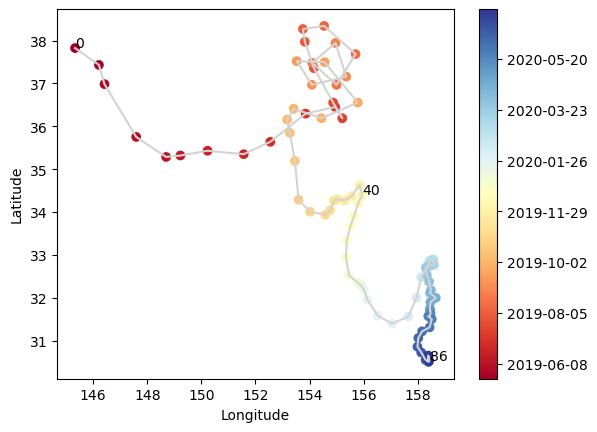

In [28]:
fig, ax = plt.subplots()

ax.plot(ds3.longitude, ds3.latitude, c="lightgrey")
mappable = ax.scatter(ds3.longitude, ds3.latitude, c=ds3.juld, cmap="RdYlBu")

for jj in [0,40,-1]:
    ax.text(ds3.longitude[jj]+0.02
            , ds3.latitude[jj]+0.02
            ,ds3.n_prof[jj].values)

cbar = fig.colorbar(mappable, ax=ax)
cbar.ax.set_yticklabels(
    pd.to_datetime(cbar.get_ticks()).strftime(date_format="%Y-%m-%d")
)

ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

## MGDSST


気象庁が公開しているMGDSSTデータをnetcdf形式に変換したファイルを用いて可視化を行う。

In [29]:
ds4 = xr.open_dataset("./Data/mgdsst.2020.nwpac.nc")
ds4

<xarray.Dataset> Size: 66MB
Dimensions:  (time: 366, lon: 280, lat: 160)
Coordinates:
  * time     (time) datetime64[ns] 3kB 2020-01-01 2020-01-02 ... 2020-12-31
  * lon      (lon) float64 2kB 110.1 110.4 110.6 110.9 ... 179.4 179.6 179.9
  * lat      (lat) float64 1kB 59.88 59.62 59.38 59.12 ... 20.62 20.38 20.12
Data variables:
    sst      (time, lat, lon) float32 66MB ...
Attributes:
    CDI:             Climate Data Interface version 2.3.0 (https://mpimet.mpg...
    Conventions:     CF-1.6
    title:           JMA MGDSST
    URL:             https://www.data.jma.go.jp/gmd/goos/data/pub/JMA-product...
    Convensions:     CF-1.4
    ConversionDate:  2023-11-22 18:35:57
    history:         Tue Nov 26 15:34:06 2024: cdo -f nc4c -z zip_9 -sellonla...
    NCO:             netCDF Operators version 4.9.1 (Homepage = http://nco.sf...
    CDO:             Climate Data Operators version 2.3.0 (https://mpimet.mpg...

赤道から北緯70度、東経110度から東経240度の領域のSSTを切り出し、単位を摂氏に変換する。

In [30]:
sst_NP = ds4["sst"].sel(lat=slice(70,0), lon=slice(110,240))
sst_NP = sst_NP - 273.15

月平均値を作成する。

In [31]:
sst_mon_NP = sst_NP.resample(time="M").mean()
sst_mon_NP.time

/home/nobu/miniforge3/envs/xa/lib/python3.12/site-packages/xarray/groupers.py:392: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(


<xarray.DataArray 'time' (time: 12)> Size: 96B
array(['2020-01-31T00:00:00.000000000', '2020-02-29T00:00:00.000000000',
       '2020-03-31T00:00:00.000000000', '2020-04-30T00:00:00.000000000',
       '2020-05-31T00:00:00.000000000', '2020-06-30T00:00:00.000000000',
       '2020-07-31T00:00:00.000000000', '2020-08-31T00:00:00.000000000',
       '2020-09-30T00:00:00.000000000', '2020-10-31T00:00:00.000000000',
       '2020-11-30T00:00:00.000000000', '2020-12-31T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 96B 2020-01-31 2020-02-29 ... 2020-12-31
Attributes:
    standard_name:  time
    long_name:      time
    axis:           T

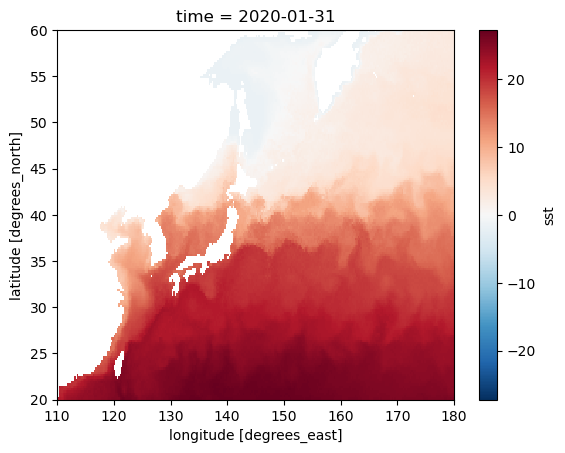

In [32]:
sst_mon_NP.sel(time="2020-01-31").plot()

面積重み付き平均値を作成する。

In [33]:
weights = np.cos(np.deg2rad(sst_mon_NP.lat))
weights.name = "weights"

In [34]:
weighted_mean = sst_mon_NP.weighted(weights).mean(("lon","lat"))

重み付き平均値と単純な平均値を重ね書きする。

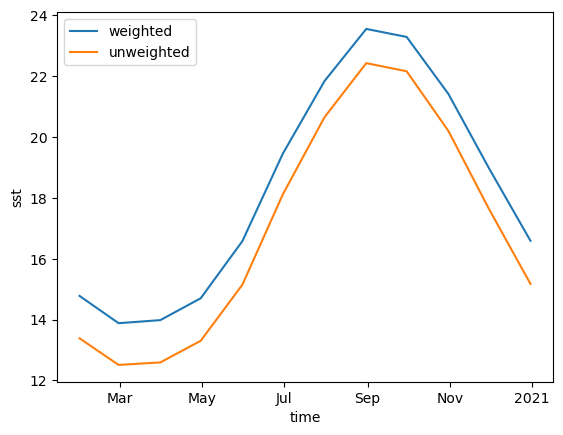

In [35]:
weighted_mean.plot(label="weighted")
sst_mon_NP.mean(("lon","lat")).plot(label="unweighted")
plt.legend()